In [34]:
import cv2 as cv
import imageio
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt

from testing_pysift_utils import unpack_octave, unpack_octave_from_kp_octave, pack_octave, \
    keypoint_octave_simplified, check_packing_and_unpacking, rotate_image_without_resize

In [2]:
sift = cv.xfeatures2d.SIFT_create()

In [3]:
patch_image = imageio.imread('images/patch_rotated_cropped.png')
patch_image_size = patch_image.shape[0]

In [ ]:
# seeing how a small difference in keypoint (angle, octave) influences the SIFT descriptor

In [4]:
# setting a keypoint manually as the centre of the patch, with size (diameter) patch size

keypoint_patch_image1 = cv.KeyPoint((patch_image_size - 1) / 2, (patch_image_size - 1) / 2, _size=patch_image_size, _angle = 0)
keypoints_patch_image1 = [keypoint_patch_image1]
_, desc_patch_image1 = sift.compute(patch_image, keypoints_patch_image1)
print(desc_patch_image1.shape)
print(desc_patch_image1)
print(keypoint_patch_image1.angle)
print(keypoint_patch_image1.octave)

(1, 128)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 139.  22.
    7.  27.  88.  97.  94. 139. 138.  47.  17.  37. 117. 106.  97. 139.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0. 139.  32.  11.  55. 139.  62.  38. 139. 106.  55.  26.  73.
  139.  72.  38.  83.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]]
0.0
0


In [5]:
# setting a keypoint manually as the centre of the patch, with size (diameter) patch size

keypoint_patch_image2 = cv.KeyPoint((patch_image_size - 1) / 2, (patch_image_size - 1) / 2, _size=patch_image_size)
keypoints_patch_image2 = [keypoint_patch_image2]
_, desc_patch_image2 = sift.compute(patch_image, keypoints_patch_image2)
print(desc_patch_image2.shape)
print(desc_patch_image2)
print(keypoint_patch_image2.angle)
print(keypoint_patch_image2.octave)

(1, 128)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 138.  22.
    7.  29.  88.  97.  93. 138. 136.  46.  16.  39. 117. 106.  98. 138.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0. 138.  32.  11.  59. 138.  61.  38. 138. 103.  56.  25.  77.
  138.  71.  39.  86.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]]
-1.0
0


In [6]:
# correlation between two keypoints with only difference in angle (0 degrees vs -1 degrees)
np.corrcoef(desc_patch_image1.reshape(128), desc_patch_image2.reshape(128))

array([[1.        , 0.99982313],
       [0.99982313, 1.        ]])

In [7]:
# setting a keypoint manually as the centre of the patch, with size (diameter) patch size

keypoint_patch_image1 = cv.KeyPoint((patch_image_size - 1) / 2, (patch_image_size - 1) / 2, _size=patch_image_size, _octave = 0)
keypoints_patch_image1 = [keypoint_patch_image1]
_, desc_patch_image1 = sift.compute(patch_image, keypoints_patch_image1)
print(desc_patch_image1.shape)
print(desc_patch_image1)
print(keypoint_patch_image1.angle)
print(keypoint_patch_image1.octave)

(1, 128)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 138.  22.
    7.  29.  88.  97.  93. 138. 136.  46.  16.  39. 117. 106.  98. 138.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0. 138.  32.  11.  59. 138.  61.  38. 138. 103.  56.  25.  77.
  138.  71.  39.  86.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]]
-1.0
0


In [8]:
# setting a keypoint manually as the centre of the patch, with size (diameter) patch size

keypoint_patch_image2 = cv.KeyPoint((patch_image_size - 1) / 2, (patch_image_size - 1) / 2, _size=patch_image_size, _octave=256)
keypoints_patch_image2 = [keypoint_patch_image2]
_, desc_patch_image2 = sift.compute(patch_image, keypoints_patch_image2)
print(desc_patch_image2.shape)
print(desc_patch_image2)
print(keypoint_patch_image2.angle)
print(keypoint_patch_image2.octave)

(1, 128)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 142.  11.
    9.  33.  98.  89.  95. 142. 109.  25.  25.  45. 129.  97. 100. 142.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0. 142.  15.  14.  63. 142.  53.  41. 142.  87.  28.  37.  85.
  142.  59.  41. 106.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]]
-1.0
256


In [9]:
# correlation between two keypoints with only difference in octave (octave 0 layer 0 vs octave 0 layer 1)
np.corrcoef(desc_patch_image1.reshape(128), desc_patch_image2.reshape(128))

array([[1.        , 0.99035713],
       [0.99035713, 1.        ]])

In [10]:
image = imageio.imread('box.png')

In [11]:
keypoint_index = 292
# keypoint, descriptor = unpickle_keypoint_with_descriptor('zimnica/pickled_keypoint' + str(keypoint_index) + '_with_descriptor20200323_163005.pickle')
# keypoint, descriptor = unpickle_keypoint_with_descriptor('zimnica/pickled_keypoint538_with_descriptor20200323_162855.pickle')
keypoint = cv.KeyPoint(x=164.63192749023438, y=108.07417297363281, _size=14.915456771850586, _angle=216.53689575195312, _response=0.04516986012458801, _octave=2687234)
keypoint1 = cv.KeyPoint(x=164, y=108, _size=14.915456771850586, _angle=216.53689575195312, _octave=258)

In [12]:
keypoints = [keypoint]
_, desc = sift.compute(image, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[  4.   9.   3.  13.  30.  68.  16.   6.   2.  13.  38.   8.   1.  42.
   60.   5.  31.  55.  23.   3.   0.  15.  28.  14.  55. 124.   8.   0.
    0.   0.   0.   3.  24.  12.   4.  16.  61.  26.   7.  13.  84.  12.
    1.   0.   5.  50. 114.  94.  10.   3.   3.   3.  71. 124.  80.  22.
   51.  82.  16.   4.  14.  18.   5.  10.  47.  40.  14.  67. 120.   8.
    0.   1. 124.  99.  13.  21.  19.  10.   6.  25.  26.  16.  11.  57.
  124. 117.  19.   8.  32.   5.   1.   2.  14.  65.  61.  56.  42.   9.
    6.  65.  66.   0.   2.  28. 124.  88.  65.  27.   2.   0.   1.  12.
   39.  45.  59.  68.   8.   5.   3.   3.  20.  33.  17.  27.   3.  12.
   13.  12.]]


In [13]:
keypoints = [keypoint1]
_, desc1 = sift.compute(image, keypoints)
print(desc1.shape)
print(desc1)

(1, 128)
[[  4.   9.   3.  13.  30.  68.  16.   6.   2.  13.  38.   8.   1.  42.
   60.   5.  31.  55.  23.   3.   0.  15.  28.  14.  55. 124.   8.   0.
    0.   0.   0.   3.  24.  12.   4.  16.  61.  26.   7.  13.  84.  12.
    1.   0.   5.  50. 114.  94.  10.   3.   3.   3.  71. 124.  80.  22.
   51.  82.  16.   4.  14.  18.   5.  10.  47.  40.  14.  67. 120.   8.
    0.   1. 124.  99.  13.  21.  19.  10.   6.  25.  26.  16.  11.  57.
  124. 117.  19.   8.  32.   5.   1.   2.  14.  65.  61.  56.  42.   9.
    6.  65.  66.   0.   2.  28. 124.  88.  65.  27.   2.   0.   1.  12.
   39.  45.  59.  68.   8.   5.   3.   3.  20.  33.  17.  27.   3.  12.
   13.  12.]]


In [14]:
np.corrcoef(desc.reshape(128), desc1.reshape(128))

array([[1., 1.],
       [1., 1.]])

In [ ]:
# keypoint with id 459

In [118]:
keypoint = cv.KeyPoint(x=308.783996582, y=192.533889771, _size=4.49870252609, _angle=3.31573486328, _octave=16253184)
keypoints = [keypoint]
_, desc_original = sift.compute(image, keypoints)
print(desc_original.shape)
print(desc_original)

(1, 128)
[[  4.   7.  11.  32.  65.  15.  10.   3.  66.  47.  15.  12.  29.   2.
    3.   6.  12.   4.   1.   2. 100.   6.   0.   1.   2.   1.   0.   0.
  151.  23.   0.   0.  13.   3.   1.  14. 151.  10.   1.   1. 151.  18.
    1.   6.  52.   4.   1.   6.  30.   1.   0.   0. 117.  11.   0.   2.
    5.   0.   0.   0. 151.  29.   0.   0.  20.   2.   0.  66. 128.   7.
    1.   6. 151.  10.   0.  12.  36.   3.   1.  36.  30.   1.   0.   1.
  111.   9.   0.   4.   7.   0.   0.   0. 151.  38.   0.   1.   9.   1.
    5.  13.  50.  45.  38.   9.  68.   9.   6.   5.  12.   5.  33.  39.
   18.   2.   2.   8.  69.   5.   0.   4.   8.   0.   0.   0. 151.  29.
    0.   1.]]


In [88]:
keypoint_octave_simplified(16253184)

256

In [116]:
keypoint = cv.KeyPoint(x=308.783996582, y=192.533889771, _size=4.49870252609, _angle=3.31573486328, _octave=256)
keypoints = [keypoint]
_, desc = sift.compute(image, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[  4.   7.  11.  32.  65.  15.  10.   3.  66.  47.  15.  12.  29.   2.
    3.   6.  12.   4.   1.   2. 100.   6.   0.   1.   2.   1.   0.   0.
  151.  23.   0.   0.  13.   3.   1.  14. 151.  10.   1.   1. 151.  18.
    1.   6.  52.   4.   1.   6.  30.   1.   0.   0. 117.  11.   0.   2.
    5.   0.   0.   0. 151.  29.   0.   0.  20.   2.   0.  66. 128.   7.
    1.   6. 151.  10.   0.  12.  36.   3.   1.  36.  30.   1.   0.   1.
  111.   9.   0.   4.   7.   0.   0.   0. 151.  38.   0.   1.   9.   1.
    5.  13.  50.  45.  38.   9.  68.   9.   6.   5.  12.   5.  33.  39.
   18.   2.   2.   8.  69.   5.   0.   4.   8.   0.   0.   0. 151.  29.
    0.   1.]]


In [90]:
keypoint = cv.KeyPoint(x=308.783996582, y=192.533889771, _size=4.49870252609, _angle=3.31573486328, _octave=0)
keypoints = [keypoint]
_, desc = sift.compute(image, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[  5.   6.  15.  37.  55.  15.  17.   3.  68.  43.  22.  13.  29.   3.
    6.  10.  32.   6.   0.   1. 104.   7.   0.   1.  11.   1.   0.   0.
  146.  23.   0.   0.  12.   4.   1.  21. 137.  21.   1.   3. 146.  26.
    2.  10.  50.   8.   2.  16.  53.   2.   0.   0. 127.  11.   0.   2.
   18.   0.   0.   0. 146.  26.   0.   1.  16.   5.   1.  72. 115.  10.
    2.  11. 143.  27.   2.  15.  35.   4.   2.  55.  50.   3.   0.   2.
  122.   9.   0.   4.  22.   1.   0.   0. 146.  34.   0.   1.   7.   4.
    5.  15.  49.  38.  48.   7.  54.  26.   8.   4.  11.   4.  45.  37.
   32.   3.   3.   6.  77.   5.   0.   3.  19.   0.   0.   0. 146.  25.
    0.   2.]]


In [91]:
keypoint = cv.KeyPoint(x=309, y=193, _size=4.49870252609, _angle=3.31573486328, _octave=0)
keypoints = [keypoint]
_, desc = sift.compute(image, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[  5.   6.  15.  37.  55.  15.  17.   3.  68.  43.  22.  13.  29.   3.
    6.  10.  32.   6.   0.   1. 104.   7.   0.   1.  11.   1.   0.   0.
  146.  23.   0.   0.  12.   4.   1.  21. 137.  21.   1.   3. 146.  26.
    2.  10.  50.   8.   2.  16.  53.   2.   0.   0. 127.  11.   0.   2.
   18.   0.   0.   0. 146.  26.   0.   1.  16.   5.   1.  72. 115.  10.
    2.  11. 143.  27.   2.  15.  35.   4.   2.  55.  50.   3.   0.   2.
  122.   9.   0.   4.  22.   1.   0.   0. 146.  34.   0.   1.   7.   4.
    5.  15.  49.  38.  48.   7.  54.  26.   8.   4.  11.   4.  45.  37.
   32.   3.   3.   6.  77.   5.   0.   3.  19.   0.   0.   0. 146.  25.
    0.   2.]]


In [92]:
# TODO keep in mind that in opencv the order is reversed!!
patch_centre_x = int(round(keypoint.pt[1]))
patch_centre_y = int(round(keypoint.pt[0]))
patch_diameter = int(2 * math.floor(keypoint.size / 2) + 1)  # rounding it to the nearest odd number
patch_radius = (patch_diameter - 1) // 2

In [103]:
# TODO check the +1 part 
patch = image[patch_centre_x - patch_diameter: patch_centre_x + patch_diameter + 1, patch_centre_y - patch_diameter: patch_centre_y + patch_diameter + 1]  # using the diameter and not the radius to get a larger patch
print "image shape", image.shape
print "patch shape", patch.shape
print "patch diameter", patch_diameter
print "patch radius", patch_radius
# TODO this could go out of the border and create an error!
print(patch_centre_x - patch_diameter, patch_centre_x + patch_diameter)
print(patch_centre_y - patch_diameter, patch_centre_y + patch_diameter)

image shape (223, 324)
patch shape (11, 11)
patch diameter 5
patch radius 2
(188, 198)
(304, 314)


In [125]:
keypoint = cv.KeyPoint(patch.shape[1] // 2, patch.shape[0] // 2, _size=4.49870252609, _angle=3.31573486328, _octave=256)
keypoints = [keypoint]
temp, desc = sift.compute(patch, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[  0.   0.   0.   0.   0.   0.   0.   0.  10.   0.   0.   0.   3.   0.
    0.   0.   2.   0.   0.   0.  14.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.  15.   0.   0.   0.   0.   0.   0.   3. 229.   5.
    0.   0. 101.  11.   1.  36.  87.   1.   0.   0. 229.  46.   1.   2.
    0.   0.   0.   0.  13.   1.   0.   0.   9.   0.   0.   0.   0.   0.
    0.   4. 229.   4.   0.   0.  84.  13.   1. 104.  85.   0.   0.   0.
  229.  60.   1.  11.   0.   0.   0.   0.  16.   1.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   8.   0.   0.   0.   1.   0.   0.   4.
    2.   0.   0.   0.  10.   1.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]]


In [95]:
print "small wtf"

small wtf


In [126]:
temp[0].pt[1]

5.0

In [127]:
patch.shape[0] // 2

5

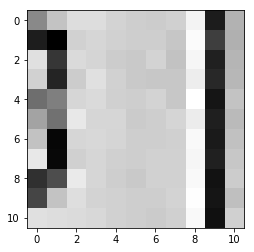

In [114]:
plt.imshow(patch, cmap='gray')

In [120]:
np.corrcoef(desc_original, desc)

array([[1.        , 0.50919856],
       [0.50919856, 1.        ]])

In [122]:
image[193 - patch_diameter: 193 + patch_diameter + 1, 309 - patch_diameter: 309 + patch_diameter + 1]

Image([[ 99, 135, 150, 150, 144, 141, 140, 142, 164,  33, 124],
       [ 34,  16, 143, 146, 143, 141, 141, 136, 168,  54, 123],
       [152,  49, 148, 145, 140, 138, 144, 134, 165,  36, 126],
       [143,  39, 140, 152, 143, 138, 137, 137, 160,  41, 127],
       [ 83,  93, 146, 148, 142, 141, 144, 137, 171,  29, 135],
       [115,  85, 157, 146, 146, 139, 141, 145, 159,  35, 129],
       [134,  20, 146, 147, 145, 141, 141, 142, 167,  32, 133],
       [157,  21, 142, 146, 142, 141, 143, 143, 165,  36, 137],
       [ 46,  63, 158, 146, 141, 138, 143, 143, 167,  27, 140],
       [ 58, 135, 151, 144, 143, 141, 141, 144, 170,  29, 132],
       [152, 150, 149, 147, 143, 141, 139, 142, 167,  26, 142]],
      dtype=uint8)

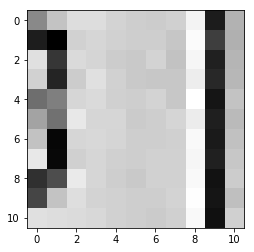

In [123]:
plt.imshow(image[193 - patch_diameter: 193 + patch_diameter + 1, 309 - patch_diameter: 309 + patch_diameter + 1], cmap='gray')

In [124]:
image[309 - patch_diameter: 309 + patch_diameter + 1, 193 - patch_diameter: 193 + patch_diameter + 1]

Image([], shape=(0, 11), dtype=uint8)

In [ ]:
# rotate the patch (we're not there yet)

In [18]:
patch_rotated = rotate_image_without_resize(patch, 360 - keypoint.angle)
print(patch_rotated.shape)

patch_rotated_cropped = patch_rotated[patch_rotated.shape[0] // 2 - patch_radius: patch_rotated.shape[0] // 2 + patch_radius + 1,
                                      patch_rotated.shape[1] // 2 - patch_radius: patch_rotated.shape[1] // 2 + patch_radius + 1]


(30, 30)


In [85]:
keypoint = cv.KeyPoint((patch_diameter - 1) / 2, (patch_diameter - 1) / 2, _size=patch_diameter, _angle = 216.53689575195312, _response=0.04516986012458801, _octave=2687234)
keypoints = [keypoint]
_, desc = sift.compute(patch, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [86]:
keypoint = cv.KeyPoint((patch_diameter - 1) / 2, (patch_diameter - 1) / 2, _size=patch_diameter, _angle = 216.53689575195312)
keypoints = [keypoint]
_, desc = sift.compute(patch, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   8.  28.
    0.   0.   0.   0.   0.   0.   1.   3.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.  13.  78.   0.   0.   3.  10.   0.   0.  22. 140.
    2.   1. 191. 191.   3.   0.   0.   0.   0.   0.  86. 191.   1.   0.
    0.   0.   0.   0.   0.   0.   0.   0.  15.  77.   0.   0.   0.   1.
    0.   0.  68. 191.   3.   1.  81. 191.   1.   0.   1.   4.   0.   0.
   64. 153.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   1.   2.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]]


In [72]:
keypoint = cv.KeyPoint((patch_diameter - 1) / 2, (patch_diameter - 1) / 2, _size=patch_diameter, _angle = 360-216.53689575195312)
keypoints = [keypoint]
_, desc = sift.compute(patch, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[  0.   0.   0.   0.   0.   0.   0.   0.  26.   0.   0.   7.   2.   0.
    0.  84.  10.   0.   0.  41.   7.   0.   0.  34.   0.   0.   0.   0.
    0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  15.  87.   3.
    3. 201.  60.   0.   0. 201.  21.   1.   6. 201. 180.   0.   0.  58.
    0.   0.   0.   5.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   2.   3.   0.   4. 199.  23.   0.   0.  20.   0.   0.   6. 201.
   31.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]]


In [28]:
keypoint_index = 292
# keypoint, descriptor = unpickle_keypoint_with_descriptor('zimnica/pickled_keypoint' + str(keypoint_index) + '_with_descriptor20200323_163005.pickle')
# keypoint, descriptor = unpickle_keypoint_with_descriptor('zimnica/pickled_keypoint538_with_descriptor20200323_162855.pickle')
keypoint = cv.KeyPoint(x=164.63192749023438, y=108.07417297363281, _size=14.915456771850586, _angle=216.53689575195312, _response=0.04516986012458801, _octave=0)
keypoint1 = cv.KeyPoint(x=164, y=108, _size=14.915456771850586, _angle=216.53689575195312)

In [29]:
keypoints = [keypoint]
_, desc = sift.compute(image, keypoints)
print(desc.shape)
print(desc)

(1, 128)
[[ 23.  26.  18.  16.  31.  51.  17.  12.  63. 105.  10.   9.  61. 109.
   17.   9.  50.  77.  20.  38.  54.  58.  35.  40.  27.  87.  15.  18.
   21.  23.  29.  16.  53.  24.  25.  33.  70.  34.   9.  47. 109.  42.
   18.  28.  62.  69.  39.  49.  49.  66.  26.  27.  58. 109.  35.  31.
   49.  72.  25.  40.  37.  54.  37.  18.  32.  32.  21.  38.  71.  35.
   11.  11. 109.  39.  19.  33.  43.  17.  15.  31.  47.  45.  20.  60.
   92.  89.  12.  27.  41.  66.  22.  33.  24. 104.  36.  41.  32.   5.
    7.  41.  47.  12.   5.  33.  84.  26.  19.  36.  22.  12.   7.  21.
   60.  23.  21.  61.  59.  12.   8.  48.  16.  30.  33.  29.  25.  29.
   23.  34.]]


In [30]:
keypoints = [keypoint1]
_, desc1 = sift.compute(image, keypoints)
print(desc1.shape)
print(desc1)

(1, 128)
[[ 23.  29.  18.  15.  30.  54.  17.  11.  64. 106.  10.  10.  62. 108.
   16.   9.  48.  78.  19.  38.  54.  56.  35.  40.  27.  88.  14.  17.
   20.  22.  27.  15.  53.  23.  25.  33.  67.  32.   9.  47. 108.  44.
   17.  26.  61.  75.  40.  48.  48.  68.  27.  28.  57. 108.  35.  31.
   48.  72.  24.  39.  36.  51.  37.  17.  36.  33.  21.  37.  69.  33.
   10.  11. 108.  38.  19.  34.  44.  19.  16.  31.  45.  46.  19.  58.
   89.  96.  12.  26.  40.  66.  22.  34.  24.  99.  38.  43.  33.   6.
    7.  38.  45.  12.   5.  32.  84.  27.  19.  37.  23.  11.   7.  20.
   59.  23.  21.  60.  59.  13.   9.  49.  15.  32.  34.  29.  24.  31.
   24.  34.]]
